In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Configuración de parámetros para generar las gráficas
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [2]:
# Lectura de archivo del dataset
# URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
df = pd.read_csv('./diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Análisis exploratorio

In [3]:
# Lectura de los 5 primeros registros del dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Estadística descriptiva del dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Verifica que no existan valores nulos en el dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Análisis de correlación de datos

## Distribución de los datos

In [6]:
# Genera gráfico de relaciones por pares en el dataset
# sns.pairplot(df, hue="Outcome")
# plt.savefig("./output/pairplot.jpg", dpi=300)

## Correlación de los datos

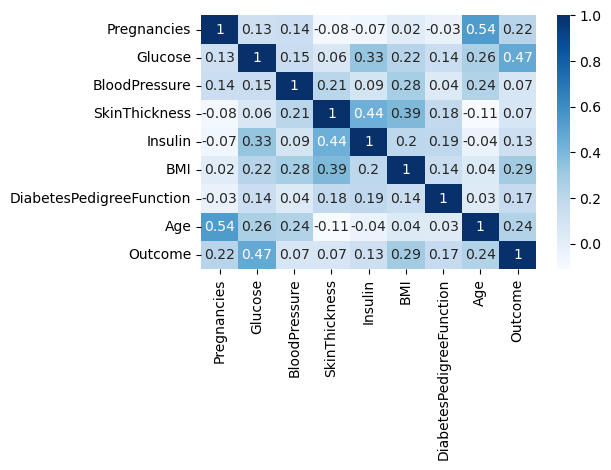

In [7]:
# Calcula la correlación por pares
corr = df.corr().round(2)

# Genera gráfico de la correlación por pares
sns.heatmap(data=corr, annot=True, cmap="Blues")
plt.tight_layout()
plt.savefig("./output/corr.jpg", dpi=300)

# Preparación del dataset

## Eliminación de los features

In [8]:
# Elimina los features con correlación nula
df = df.drop(['BloodPressure', 'SkinThickness'],axis=1)

In [9]:
# Reemplaza los valores de la clase 0 y 1 por Positive y Negative
df['Outcome'] = df['Outcome'].replace({1:"Positive",0:"Negative"})

# Cambia el nombre de la columna Outcome por Clase
df.rename(columns={'Outcome':'Class'},inplace=True)

<Axes: ylabel='Class'>

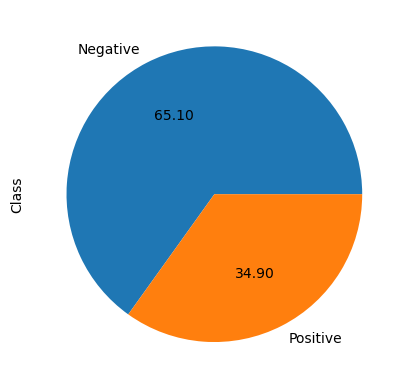

In [10]:
# Grafica la distribución de las clases
df['Class'].value_counts().plot.pie(autopct='%.2f')

## Balanceo de los datos

<Axes: ylabel='Class'>

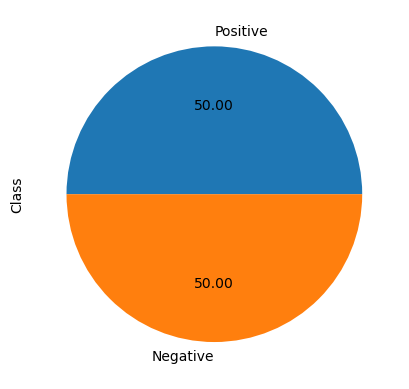

In [11]:
# Balancea los datos utilizando la técnica SMOTE de over sampling 
from imblearn.over_sampling import SMOTE
smote = SMOTE()
df_bal_x, df_bal_y = smote.fit_resample(df.iloc[:,0:-1], df.iloc[:,-1:])
# Grafica la distribución de las clases después del balanceo de datos
df_bal = pd.DataFrame(df_bal_x, columns=df.columns)
df_bal['Class'] = df_bal_y
df_bal['Class'].value_counts().plot.pie(autopct='%.2f')

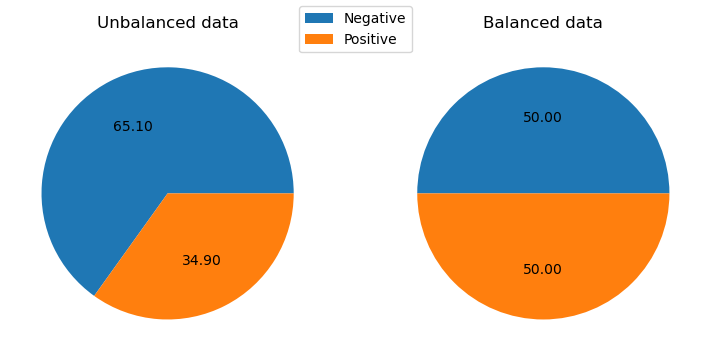

In [12]:
# Grafica la comparación de la distribución de las clases antes y después del balanceo de datos
fig, axs = plt.subplots(1,2, sharex=True, sharey='row', figsize=(8, 4))
fig.tight_layout(pad=2)
fig.axes[0].pie(df['Class'].value_counts(), autopct='%.2f')
fig.axes[0].title.set_text('Unbalanced data')
fig.axes[1].pie(df_bal['Class'].value_counts(), autopct='%.2f')
fig.axes[1].title.set_text('Balanced data')
fig.legend(['Negative', 'Positive'], loc = 'upper center')
plt.savefig("./output/balance.jpg", dpi=300)
plt.show()

# PCA

## PCA sin normalización

In [13]:
# Separa las columnas que contienen los features del que contiene la clase
df_features = df_bal.iloc[:,:-1]
df_class = df_bal.iloc[:,-1]

In [14]:
# Reduce las features a dos dimensiones
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features = pca.fit_transform(df_features)

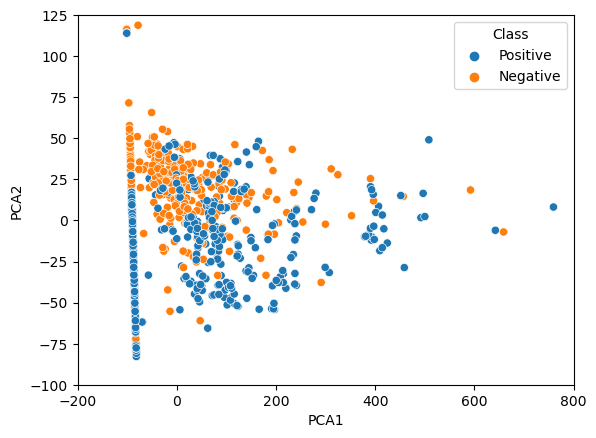

In [15]:
# Reconstruye el dataframe después de aplicar el PCA
df_pca_no_bal = pd.DataFrame({'PCA1': features[:,0], 'PCA2': features[:,1], 'Class': df_class[:]})
# Grafica la dispersión de los datos para cada clase 
sns.scatterplot(data=df_pca_no_bal, x="PCA1", y="PCA2", hue="Class")
plt.show()

## PCA con normalización

In [16]:
# Escala las features a valores de un rango entre -1 y 1
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
features_norm = scaler.fit_transform(df_features)

In [17]:
# Reduce las features con valores normalizados a dos dimensiones
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_norm = pca.fit_transform(features_norm)

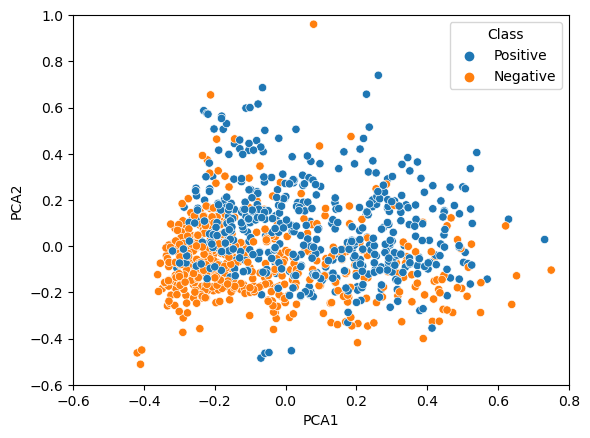

In [18]:
# Reconstruye el dataframe después de aplicar el PCA
df_pca = pd.DataFrame({'PCA1': features_norm[:,0], 'PCA2': features_norm[:,1], 'Class': df_class[:]})
# Grafica la dispersión de los datos para cada clase 
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="Class")
plt.show()

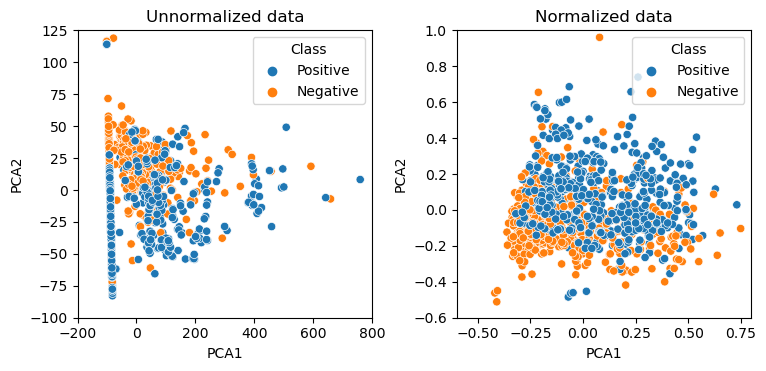

In [19]:
# Grafica la comparación de la dispersión de las clases antes y después de la normalización de datos 
fig, axs = plt.subplots(1,2, figsize=(8, 4))
fig.tight_layout(pad=3)
sns.scatterplot(data=df_pca_no_bal, x="PCA1", y="PCA2", hue="Class", ax=axs[0])
fig.axes[0].title.set_text('Unnormalized data')
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="Class", ax=axs[1])
fig.axes[1].title.set_text('Normalized data')
plt.savefig("./output/pca.jpg", dpi=300)

# Entrenamiento del modelo

## División de los datos

In [33]:
# Elimina la columna clase del dataframe y crea uno nuevo solo con las features
X = df_pca.drop('Class',axis=1)
X.head()

,PCA1,PCA2
0,0.294430,0.005021
1,-0.203757,-0.193153
2,0.209131,0.067102
3,-0.310044,-0.134344
4,-0.144382,0.444010


In [21]:
# Crea un dataframe únicamente con las clases
y = df_pca['Class']
y.head()

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Class, dtype: object

In [22]:
# Divide el dataset para el entranamiento
# Un 80% serán datos de entrenamiento y el otro 20% para el test
# Para que la evaluación del modelo sea precisa, se estratificó la cantidad de las clases para cada segmento de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Entrenamiento del modelo

### Indentificación del mejor valor para K

In [23]:
# Carga el clasificador del knn notebook
%run knn.ipynb

# Entrena el modelo con la clasificador custom para identificar el mejor valor para k
scores = []
for i in range(1,16):
    knn = CustomClassifier(i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test,y_test))

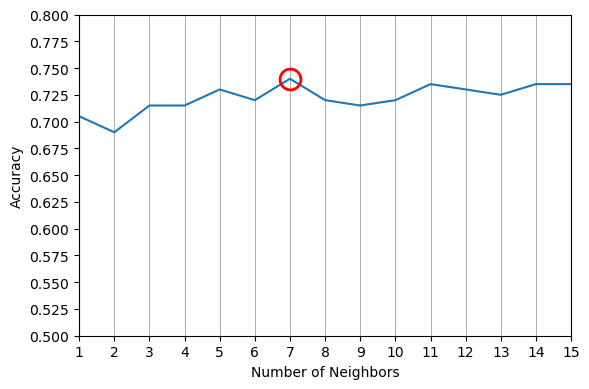

In [24]:
# Convierte los datos en un dataframe
df_scores = pd.DataFrame({'Number of Neighbors': range(1,16), 'Accuracy': scores})

# Grafica los resultados del score según el número de vecinos
plt.figure(figsize=(6,4))
sns.lineplot(data=df_scores, x='Number of Neighbors', y='Accuracy')
# Marca el vecino con mejor score
plt.plot(df_scores.loc[df_scores['Accuracy'] == df_scores['Accuracy'].max(), 'Number of Neighbors'].values[0], df_scores['Accuracy'].max(), 'o', ms=15, mec='red', mfc='none', mew=2)
# Modifica el gráfico
plt.xlim(1,15)
plt.xticks(np.arange(1, 16, 1))
plt.yticks(np.arange(.5, .8, .025))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
ax = plt.gca()
ax.xaxis.grid(True)
plt.tight_layout()
plt.savefig("./output/best_k.jpg", dpi=300)

### Entrenamiento del modelo con el mejor valor k

In [25]:
# Entrena el modelo con el mejor valor para k
best_k = df_scores.set_index(df_scores.columns[0]).idxmax(axis=0)[0]
knn = CustomClassifier(best_k)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.74

# Evaluación del modelo

## Matriz de confusión

In [31]:
# Obtiene la lista de clases que determinó el modelo
y_pred = knn.predict(X_test)

# Construye la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
# print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True).to_latex())

Predicted,Negative,Positive,All
True,,,
Negative,65,35,100
Positive,17,83,100
All,82,118,200


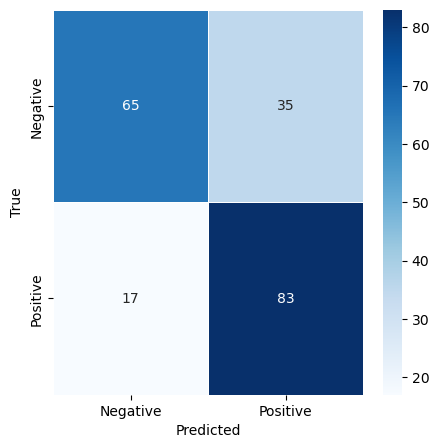

In [27]:
# Convierte la matriz de confusión en un dataframe
cm_labels = ['Negative', 'Positive']
cm_df = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)

# Grafica la matriz de confusión
f, ax = plt.subplots(figsize=(5,5))
labels = np.unique(y_test)
sns.heatmap(cm_df, annot = True, linewidths=0.5, fmt=".0f", ax=ax, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("./output/conf_matrix.jpg", dpi=300)

## Reporte de métricas

In [28]:
# Genera el reporte de métricas para el modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

    Negative      0.793     0.650     0.714       100
    Positive      0.703     0.830     0.761       100

    accuracy                          0.740       200
   macro avg      0.748     0.740     0.738       200
weighted avg      0.748     0.740     0.738       200



In [29]:
# Convierte la matriz en un dataframe
report = classification_report(y_test, y_pred, output_dict=True)
report.update({"accuracy": {"precision": None, "recall": None, "f1-score": report["accuracy"], "support": report['macro avg']['support']}})
pd.DataFrame(report).transpose().round(3)
print(pd.DataFrame(report).transpose().round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  precision &  recall &  f1-score &  support \\
\midrule
Negative     &      0.793 &    0.65 &     0.714 &    100.0 \\
Positive     &      0.703 &    0.83 &     0.761 &    100.0 \\
accuracy     &        NaN &     NaN &     0.740 &    200.0 \\
macro avg    &      0.748 &    0.74 &     0.738 &    200.0 \\
weighted avg &      0.748 &    0.74 &     0.738 &    200.0 \\
\bottomrule
\end{tabular}



/var/folders/dm/k14wnd09289d_m16bldd1zbw0000gn/T/ipykernel_94522/3887542921.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(report).transpose().round(3).to_latex())
